In [417]:
#DEMO PROGRAM
#TO DISPLAY READING INPUTS FROM A CSV FILE TO VARIABLES
#TO DISPLAY PROCESSING AND WRITING OUTPUT TO A CSV FILE

import random as rand
import math

class RANDSCATTER:
    def __init__(self,alpha,beta):
        self.alpha = alpha
        self.beta = beta

        
    ##THIS PART IS OPTIONAL
    ##USED THIS TO GENERATE X-Y GRID FOR THIS EXAMPLE ONLY
    def INPUTGRID(self):
        dx=0.10
        dy=0.10
        ngrid=200
        xmin=-10.00
        ymin=-10.00
        
        file = open("XYINPUT.csv","w")  # OPENING CSV-FILE FOR WRITING
        file.write("XVAL,YVAL\n")       # HEADER-LINE OF CSV-FILE
        
        ##LOOP OVER X,Y TO CREATE GRIDS
        for ix in range(0,ngrid+1):
            for iy in range(0,ngrid+1):
                xval=xmin+dx*ix
                yval=ymin+dy*iy
                file.write("{0:.6f},{1:.6f}\n".format(xval,yval)) #WRITING IN CSV FILE
        file.close() #FILE CLOSE
        
    
    ##FOLLOW THIS PART FOR THE TP1 PROJECT
    def TESTOUTPUT(self):
        #OUTPUT CSV-FILE
        file2 = open("XYOUTPUT.csv","w")   # "w" MEANS OPEN-FILE FOR WRITING
        file2.write("XVAL,YVAL,DENSITY\n") #HEADER LINE OF OUTPUT CSV-FILE
        
        #INPUT CSV-FILE
        file1 = open("XYINPUT.csv","r")    # "r" MEANS OPEN-FILE FOR READING ONLY
        linefile1 = csv.reader(file1)      # FUNCTION FOR PROCESSING LINE IN A CSV-FILE

        next(linefile1)                    # ESCAPE THE FIRST LINE OF CSV-FILE : HEADER LINE
        for row in linefile1:              # LOOP TO READ ELEMENTS OF CSV-FILE
            xval = float(row[0])           # 1ST ELEMENT OF ROW, USE "float()" FOR PROPER CONVERSION
            yval = float(row[1])           # 2ND ELEMENT OF ROW, USE "float()" FOR PROPER CONVERSION
            
            if ((xval*yval) > 0.00 ):
                f1 = self.alpha*rand.uniform(0.0,1.0) 
                f2 = self.beta*rand.uniform(-1.0,0.0)
                ff=f1+f2                       # 3RD ELEMENT, FILLING WITH RANDOM NUMBER
            else:
                f1 = self.beta*rand.uniform(0.0,1.0) 
                f2 = self.alpha*rand.uniform(-1.0,0.0)
                ff=f1+f2                       # 3RD ELEMENT, FILLING WITH RANDOM NUMBER
            
            ##PRINTING OUTPUT WITH FORMAT
            file2.write("{0:.4f},{1:.4f},{2:.6f}\n".format(xval,yval,ff))
            #print("{0:.4f},{1:.4f},{2:.6f}".format(xval,yval,ff))
        file1.close() #FILE CLOSE
        file2.close() #FILE CLOSE

In [418]:
#SETTING OBJECT
OBJ1 = RANDSCATTER(0.8,0.2)

In [419]:
#CREATING X-Y GRID
#INPUT FILE => "XYINPUT.csv"
OBJ1.INPUTGRID()

In [420]:
#OUTPUT FILE: X,Y and Random Number values
#FILE => "XYOUTPUT.csv"
OBJ1.TESTOUTPUT()

In [421]:
#PLOTTING OUTPUT CSV DATA FILE
#importing pandas and matplotlib

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("XYOUTPUT.csv")
for col in df.columns:
    print(col)

XVAL
YVAL
DENSITY


In [422]:
#PRINTING HEAD
df.head()

,XVAL,YVAL,DENSITY
0,-10.0,-10.0,0.132370
1,-10.0,-9.9,0.025430
2,-10.0,-9.8,0.141567
3,-10.0,-9.7,0.450581
4,-10.0,-9.6,0.389029


In [423]:
#PRINTING TAIL
df.tail()

,XVAL,YVAL,DENSITY
40396,10.0,9.6,0.490221
40397,10.0,9.7,0.360224
40398,10.0,9.8,0.067055
40399,10.0,9.9,0.504543
40400,10.0,10.0,0.669134


In [424]:
#PRINTING MAXIMUM IN EACH COLUMN
df.max()

XVAL       10.000000
YVAL       10.000000
DENSITY     0.797987
dtype: float64

In [425]:
#PRINTING MINIMUM IN EACH COLUMN
df.min()

XVAL      -10.000000
YVAL      -10.000000
DENSITY    -0.796778
dtype: float64

In [426]:
#PRINTING ROW ELEMENTS OF FOR MAXIMUM VALUE OF "DENSITY"
df.loc[df['DENSITY'].idxmax()]

XVAL       2.200000
YVAL       8.700000
DENSITY    0.797987
Name: 24709, dtype: float64

In [427]:
#PRINTING ROW ELEMENTS OF FOR MINIMUM VALUE OF "DENSITY"
df.loc[df['DENSITY'].idxmin()]

XVAL      -0.100000
YVAL       7.000000
DENSITY   -0.796778
Name: 20069, dtype: float64

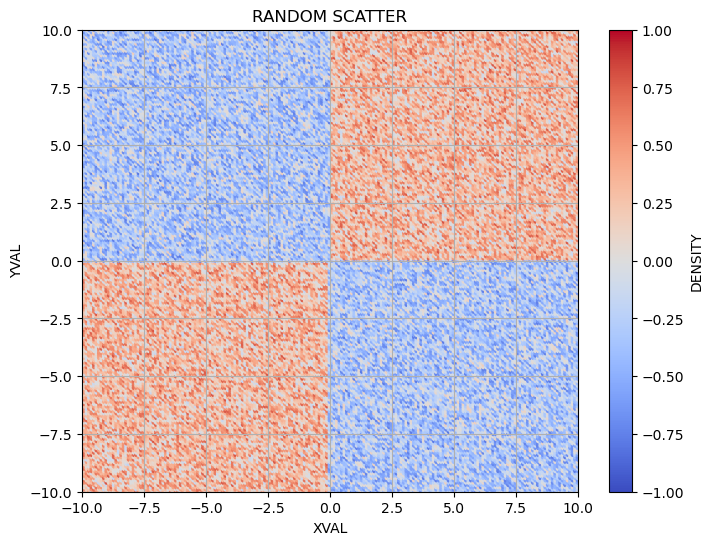

In [428]:
#x,y,c => x-axis, y-axis, z-axis
#colormap       => Colour Scheme for contour plot
#xlim, ylim     => Set minimum,maximum values in x-axis and y-axis
#vmin,vmax      => Set minimum and maximum values in z-axis
#xticks, yticks => Set the position of markers in x-axis and yaxis
#s => Size of the shape
#grid => Set grid on plot
#figsize => Set size of the figure

df.plot( x="XVAL", y="YVAL", kind="scatter", c="DENSITY",colormap="coolwarm", xlim=(-10,10), ylim=(-10,10), 
        vmin=(-1), vmax=(1), xticks=(-10,-7.5,-5.0,-2.5,0,2.5,5.0,7.5,10.0), 
        yticks=(-10,-7.5,-5.0,-2.5,0,2.5,5.0,7.5,10.0),
        s=(5.5), grid=("on"), figsize=(8,6))


plt.title("RANDOM SCATTER",fontsize='12')
plt.show()